In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import sem


### Read NFL-QB csv data ###

In [2]:
nfl_te_file =  "Data/NFLTEDATA_Mod.csv"
nfl_wb_file = "Data/NFLWRDATA_Mod.csv"
nfl_rb_file = "Data/NFLRBDATA_Mod.csv"
nfl_file = "Data/NFLQBDATA_Mod.csv"
nfl_data_df = pd.read_csv(nfl_file)
nfl_data_df.head()

,Rk,Player,From,To,No. of Season,Tm,Lg,G,GS,Cmp,...,Yds.1,Y/A,AY/A,ANY/A,Y/G,W,L,T,4QC,GWD
0,1,Peyton Manning,1998,2015,18,TOT,NFL,266.0,265.0,6125,...,1953,7.67,7.61,7.17,270.5,186.0,79.0,0.0,43.0,54.0
1,2,Tom Brady,2000,2019,20,NWE,NFL,273.0,271.0,6094,...,2960,7.52,7.81,7.14,262.2,211.0,60.0,0.0,35.0,44.0
2,3,Drew Brees,2001,2019,19,TOT,NFL,266.0,265.0,6621,...,2821,7.61,7.60,7.03,281.4,156.0,109.0,0.0,35.0,49.0
3,4,Brett Favre*,1991,2010,20,TOT,NFL,302.0,298.0,6300,...,3487,7.06,6.58,5.93,237.9,186.0,112.0,0.0,28.0,43.0
4,5,Philip Rivers,2004,2019,16,SDG,NFL,216.0,212.0,4619,...,2552,7.82,7.76,6.99,258.8,120.0,92.0,0.0,26.0,31.0


In [3]:
nfl_data_df.columns

Index(['Rk', 'Player', 'From', 'To', 'No. of Season', 'Tm', 'Lg', 'G', 'GS',
       'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'Int', 'Pick6', 'TD%', 'Int%',
       'Rate', 'Sk', 'Yds.1', 'Y/A', 'AY/A', 'ANY/A', 'Y/G', 'W', 'L', 'T',
       '4QC', 'GWD'],
      dtype='object')

In [4]:
filtered_column =nfl_data_df[nfl_data_df['To']!=2019]
filtered_column.head()

,Rk,Player,From,To,No. of Season,Tm,Lg,G,GS,Cmp,...,Yds.1,Y/A,AY/A,ANY/A,Y/G,W,L,T,4QC,GWD
0,1,Peyton Manning,1998,2015,18,TOT,NFL,266.0,265.0,6125,...,1953,7.67,7.61,7.17,270.5,186.0,79.0,0.0,43.0,54.0
3,4,Brett Favre*,1991,2010,20,TOT,NFL,302.0,298.0,6300,...,3487,7.06,6.58,5.93,237.9,186.0,112.0,0.0,28.0,43.0
9,10,Carson Palmer,2004,2017,14,TOT,NFL,182.0,181.0,3941,...,2364,7.33,6.93,6.22,254.1,92.0,88.0,1.0,22.0,35.0
10,11,Vinny Testaverde,1989,2007,19,TOT,NFL,212.0,195.0,3494,...,2560,6.90,6.08,5.33,197.7,85.0,109.0,1.0,27.0,30.0
11,12,Drew Bledsoe,1993,2006,14,TOT,NFL,194.0,193.0,3839,...,3135,6.64,6.01,5.18,230.0,98.0,95.0,0.0,24.0,31.0


In [5]:
trial_data = filtered_column[['Rk', 'Player', 'No. of Season']]

# Convert to DataFrame

mean_data =trial_data.groupby(['Rk', 'Player'], as_index = False)['No. of Season'].mean()
players_season_data = pd.DataFrame(mean_data)

# Preview DataFrame

players_season_data.head()

,Rk,Player,No. of Season
0,1,Peyton Manning,18
1,4,Brett Favre*,20
2,10,Carson Palmer,14
3,11,Vinny Testaverde,19
4,12,Drew Bledsoe,14


In [10]:
std_value_qb = round(players_season_data['No. of Season'].std(),2)
std_value_qb

4.43

In [11]:
mean_value_qb = players_season_data['No. of Season'].mean()
mean_value_qb

5.784653465346534

In [12]:
median_value_qb = players_season_data['No. of Season'].median()
median_value_qb

5.0

In [13]:
# Use numpy to create quartiles
qb_q1 = np.percentile(players_season_data['No. of Season'], 25)
qb_q3 = np.percentile(players_season_data['No. of Season'],75)
print(f"Q1 is {qb_q1}")
print(f"Q3 is {qb_q3}")

Q1 is 2.0
Q3 is 9.0


In [14]:
# Calculate the interquartile range
iqr = (qb_q3 - qb_q1)
print("interquartile range:", iqr)

interquartile range: 7.0


In [15]:
# Find lower boundary
# Q1 - 1.5 * IQR
lower_boundary = qb_q1 - (1.5 * iqr)
lower_boundary

-8.5

In [16]:
# Find upper boundary
# Q3 + 1.5 * IQR
upper_boundary = qb_q3 + (1.5 * iqr)
upper_boundary

19.5

In [17]:
# Check for any lower outliers
arr = players_season_data['No. of Season']
# Check for any upper outliers

In [18]:
# Check for any upper outliers
arr[arr >= upper_boundary]

1    20
Name: No. of Season, dtype: int64

<IPython.core.display.Javascript object>


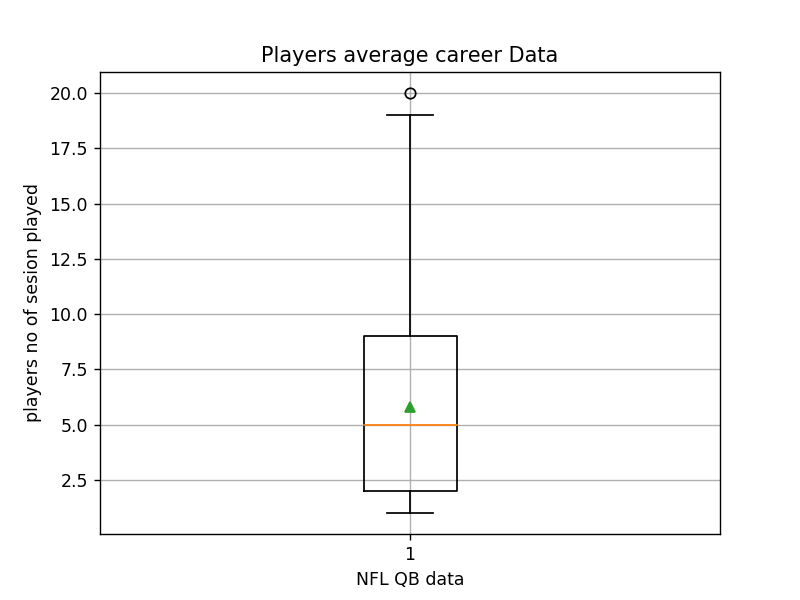

In [19]:
# Create box plot
plt.boxplot(players_season_data['No. of Season'], showmeans=True)
plt.grid()
plt.title("Players average career Data")
plt.ylabel("players no of sesion played")
plt.xlabel("NFL QB data")
plt.show()


### Running Back players Data  1989 - 2019###

In [20]:
#  reading running back players data 
nfl_rb_data_df = pd.read_csv(nfl_rb_file)
#  preview Dataframe
nfl_rb_data_df.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Att,Yds,Y/A,TD,Y/G
0,1,Emmitt Smith*,1990,2004,15,TOT,NFL,226.0,219.0,4409,18355,4.16,164,81.2
1,2,Barry Sanders*,1989,1998,10,DET,NFL,153.0,151.0,3062,15269,4.99,99,99.8
2,3,Frank Gore,2005,2019,15,TOT,NFL,214.0,199.0,3443,15021,4.36,79,70.2
3,4,Curtis Martin*,1995,2005,11,TOT,NFL,168.0,166.0,3518,14101,4.01,90,83.9
4,5,LaDainian Tomlinson*,2001,2011,11,TOT,NFL,170.0,155.0,3174,13684,4.31,145,80.5


In [21]:
#  dropping currunt players from dataframe column
filtered_rb_column =nfl_rb_data_df[nfl_rb_data_df['To']!=2019]
filtered_rb_column.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Att,Yds,Y/A,TD,Y/G
0,1,Emmitt Smith*,1990,2004,15,TOT,NFL,226.0,219.0,4409,18355,4.16,164,81.2
1,2,Barry Sanders*,1989,1998,10,DET,NFL,153.0,151.0,3062,15269,4.99,99,99.8
3,4,Curtis Martin*,1995,2005,11,TOT,NFL,168.0,166.0,3518,14101,4.01,90,83.9
4,5,LaDainian Tomlinson*,2001,2011,11,TOT,NFL,170.0,155.0,3174,13684,4.31,145,80.5
5,6,Jerome Bettis*,1993,2005,13,TOT,NFL,192.0,153.0,3479,13662,3.93,91,71.2


In [22]:
# finding staderd deviation of running back players
std_rb_value = filtered_rb_column['No of Season'].std()
std_rb_value

3.1188598661352436

In [23]:
# finding mean of running back players
mean_rb_value = filtered_rb_column['No of Season'].mean()
mean_rb_value

4.210815047021944

In [24]:
# finding median of running back players
median_rb_value = filtered_rb_column['No of Season'].median()
median_rb_value

3.0

In [25]:
# Use numpy to create quartiles
rb_q1 = np.percentile(filtered_rb_column['No of Season'], 25)
rb_q3 = np.percentile(filtered_rb_column['No of Season'],75)
print(f"Q1 is {rb_q1}")
print(f"Q3 is {rb_q3}")

Q1 is 2.0
Q3 is 6.0


In [26]:
# Calculate the interquartile range
rb_iqr = (rb_q3 - rb_q1)
print("interquartile range:", rb_iqr)

interquartile range: 4.0


In [27]:
# Find lower boundary
rb_lower_boundary = rb_q1 - (1.5 * rb_iqr)
rb_lower_boundary

-4.0

In [28]:
# Find upper boundary
rb_upper_boundary = rb_q3 + (1.5 * rb_iqr)
rb_upper_boundary

12.0

In [29]:
# Check for any upper outliers
rb_arr = filtered_rb_column['No of Season']
rb_arr[rb_arr>= rb_upper_boundary]

0       15
5       13
7       12
9       13
10      12
12      12
13      12
17      12
20      12
21      13
26      12
33      12
123     13
146     12
184     14
199     14
221     14
242     16
244     13
300     12
301     16
375     14
405     16
450     12
517     12
538     12
582     12
711     14
721     13
946     13
989     13
1274    14
1319    14
Name: No of Season, dtype: int64

In [30]:
# Check for any lower outliers
rb_arr[rb_arr<= rb_lower_boundary]

Series([], Name: No of Season, dtype: int64)

<IPython.core.display.Javascript object>


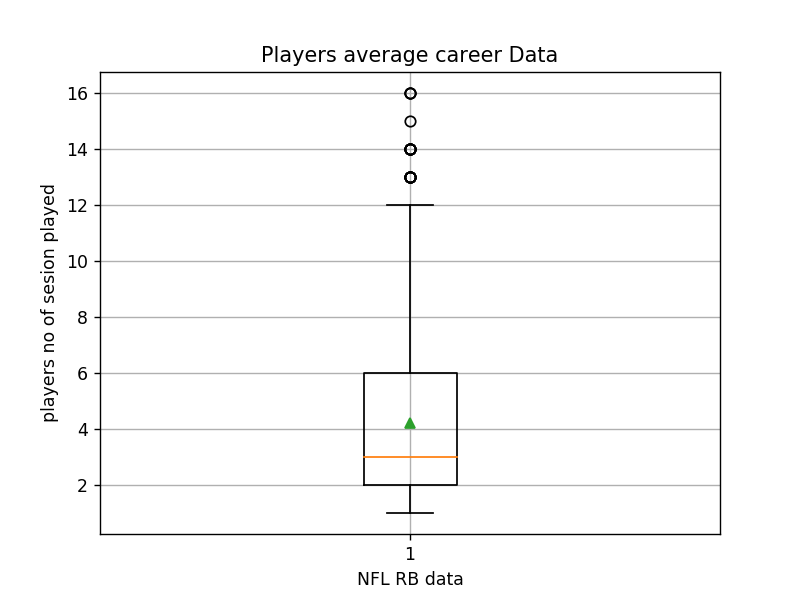

In [32]:
# Create box plot
plt.boxplot(rb_arr, showmeans=True)
plt.grid()
plt.title("Players average career Data")
plt.ylabel("players no of sesion played")
plt.xlabel("NFL RB data")
plt.show()


### Wide Receiver Players Data 1989-2019 ### 

In [33]:
#  reading wide receiver players data
wide_receiver_data_df = pd.read_csv(nfl_wb_file)
# preview dataframe
wide_receiver_data_df.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Tgt,Rec,Yds,Y/R,TD,Y/G,Ctch%,Y/Tgt
0,1,Jerry Rice*,1989,2004,16,TOT,NFL,243.0,237.0,1640.0,1285,18014,14.02,148,74.1,NaN,NaN
1,2,Larry Fitzgerald,2004,2019,16,CRD,NFL,238.0,236.0,2190.0,1326,16579,12.50,118,69.7,60.50%,7.57
2,3,Terrell Owens*,1996,2010,15,TOT,NFL,219.0,201.0,1867.0,1078,15934,14.78,153,72.8,57.70%,8.53
3,4,Randy Moss*,1998,2012,15,TOT,NFL,218.0,193.0,1741.0,982,15292,15.57,156,70.1,56.40%,8.78
4,5,Isaac Bruce,1994,2009,16,TOT,NFL,223.0,201.0,1770.0,1024,15208,14.85,91,68.2,57.90%,8.59


In [34]:
#  dropping currunt players from dataframe column
filtered_wb_column =wide_receiver_data_df[wide_receiver_data_df['To']!=2019]
filtered_wb_column.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Tgt,Rec,Yds,Y/R,TD,Y/G,Ctch%,Y/Tgt
0,1,Jerry Rice*,1989,2004,16,TOT,NFL,243.0,237.0,1640.0,1285,18014,14.02,148,74.1,NaN,NaN
2,3,Terrell Owens*,1996,2010,15,TOT,NFL,219.0,201.0,1867.0,1078,15934,14.78,153,72.8,57.70%,8.53
3,4,Randy Moss*,1998,2012,15,TOT,NFL,218.0,193.0,1741.0,982,15292,15.57,156,70.1,56.40%,8.78
4,5,Isaac Bruce,1994,2009,16,TOT,NFL,223.0,201.0,1770.0,1024,15208,14.85,91,68.2,57.90%,8.59
5,6,Steve Smith,2001,2016,16,TOT,NFL,219.0,198.0,1748.0,1031,14731,14.29,81,67.3,59.00%,8.43


In [35]:
# finding staderd deviation of wide receiver players
std_wb_value = filtered_wb_column['No of Season'].std()
std_wb_value

3.314233609978232

In [36]:
# finding mean of wide receiver players
mean_wb_value = filtered_wb_column['No of Season'].mean()
mean_wb_value

4.1109540636042405

In [37]:
# finding median of wide receiver players
median_wb_value = filtered_wb_column['No of Season'].median()
median_wb_value

3.0

In [38]:
# Use numpy to create quartiles
wb_q1 = np.percentile(filtered_wb_column['No of Season'], 25)
wb_q3 = np.percentile(filtered_wb_column['No of Season'],75)
print(f"Q1 is {wb_q1}")
print(f"Q3 is {wb_q3}")

Q1 is 1.0
Q3 is 6.0


In [39]:
# Calculate the interquartile range
wb_iqr = (wb_q3 - wb_q1)
print("interquartile range:", wb_iqr)

interquartile range: 5.0


In [40]:
# Find lower boundary
wb_lower_boundary = wb_q1 - (1.5 * wb_iqr)
wb_lower_boundary

-6.5

In [41]:
# Find upper boundary
wb_upper_boundary = wb_q3 + (1.5 * wb_iqr)
wb_upper_boundary

13.5

In [42]:
# Check for any upper outliers
wb_arr = filtered_wb_column['No of Season']
wb_arr[wb_arr>= wb_upper_boundary]

0      16
2      15
3      15
4      16
5      16
7      14
8      16
9      14
10     14
12     14
14     14
15     14
16     15
18     14
20     16
25     16
29     14
32     14
45     17
61     14
92     15
113    14
123    15
562    17
Name: No of Season, dtype: int64

In [43]:
# Check for any lower outliers
wb_arr[wb_arr<= wb_lower_boundary]

Series([], Name: No of Season, dtype: int64)

<IPython.core.display.Javascript object>


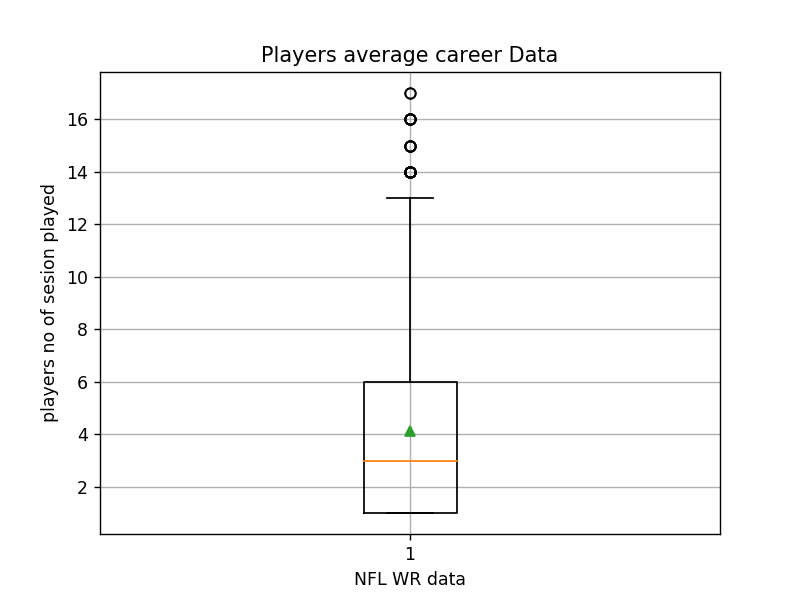

In [44]:
# Create box plot
plt.boxplot(wb_arr, showmeans=True)
plt.grid()
plt.title("Players average career Data")
plt.ylabel("players no of sesion played")
plt.xlabel("NFL WR data")
plt.show()

### Tight End players Data 1989 - 2019 ###

In [45]:
#  reading TE players data
te_data_df = pd.read_csv(nfl_te_file)
# preview dataframe
te_data_df.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Tgt,Rec,Yds,Y/R,TD,Y/G,Ctch%,Y/Tgt
0,1,Tony Gonzalez*,1997,2013,17,TOT,NFL,270.0,254.0,2012.0,1325,15127,11.42,111,56.0,65.90%,7.52
1,2,Jason Witten,2003,2019,17,DAL,NFL,243.0,233.0,1636.0,1166,12592,10.80,70,51.8,71.30%,7.70
2,3,Antonio Gates,2003,2018,16,SDG,NFL,236.0,190.0,1459.0,955,11841,12.40,116,50.2,65.50%,8.12
3,4,Shannon Sharpe*,1990,2003,14,TOT,NFL,204.0,169.0,1197.0,815,10060,12.34,62,49.3,NaN,NaN
4,5,Greg Olsen,2007,2019,13,TOT,NFL,178.0,152.0,1111.0,684,8073,11.80,59,45.4,61.60%,7.27


In [46]:
#  dropping currunt players from dataframe column
filtered_te_column =te_data_df[te_data_df['To']!=2019]
filtered_te_column.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Tgt,Rec,Yds,Y/R,TD,Y/G,Ctch%,Y/Tgt
0,1,Tony Gonzalez*,1997,2013,17,TOT,NFL,270.0,254.0,2012.0,1325,15127,11.42,111,56.0,65.90%,7.52
2,3,Antonio Gates,2003,2018,16,SDG,NFL,236.0,190.0,1459.0,955,11841,12.40,116,50.2,65.50%,8.12
3,4,Shannon Sharpe*,1990,2003,14,TOT,NFL,204.0,169.0,1197.0,815,10060,12.34,62,49.3,NaN,NaN
5,6,Rob Gronkowski,2010,2018,9,NWE,NFL,115.0,100.0,794.0,521,7861,15.09,79,68.4,65.60%,9.90
8,9,Heath Miller,2005,2015,11,PIT,NFL,168.0,167.0,825.0,592,6569,11.10,45,39.1,71.80%,7.96


In [47]:
# finding staderd deviation of TE players
std_te_value = filtered_te_column['No of Season'].std()
std_te_value

3.4299590093951338

In [48]:
# finding staderd deviation of TE players
mean_te_value = filtered_te_column['No of Season'].mean()
mean_te_value

4.63031914893617

In [49]:
# finding staderd deviation of TE players
median_te_value = filtered_te_column['No of Season'].median()
median_te_value

4.0

In [50]:
# Use numpy to create quartiles
te_q1 = np.percentile(filtered_te_column['No of Season'], 25)
te_q3 = np.percentile(filtered_te_column['No of Season'],75)
print(f"Q1 is {te_q1}")
print(f"Q3 is {te_q3}")

Q1 is 2.0
Q3 is 7.0


In [51]:
# Calculate the interquartile range
te_iqr = (te_q3 - te_q1)
print("interquartile range:", te_iqr)

interquartile range: 5.0


In [52]:
# Find lower boundary
te_lower_boundary = te_q1 - (1.5 * te_iqr)
te_lower_boundary

-5.5

In [53]:
# Find upper boundary
te_upper_boundary = te_q3 + (1.5 * te_iqr)
te_upper_boundary

14.5

In [54]:
# Check for any upper outliers
te_arr = filtered_te_column['No of Season']
te_arr[te_arr>= te_upper_boundary]

0      17
2      16
10     15
18     15
93     15
116    15
349    17
754    15
787    16
Name: No of Season, dtype: int64

In [55]:
# Check for any lower outliers
te_arr[te_arr<= te_lower_boundary]

Series([], Name: No of Season, dtype: int64)

<IPython.core.display.Javascript object>


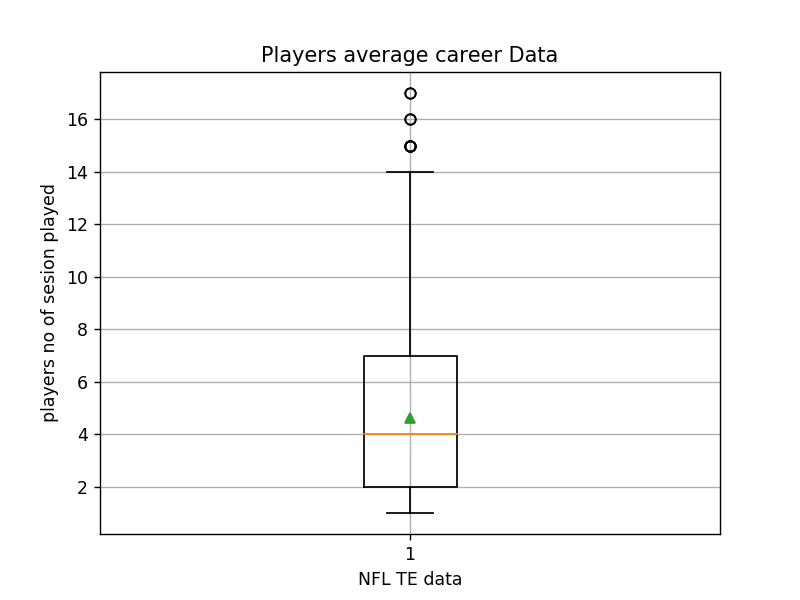

In [56]:
# Create box plot
plt.boxplot(te_arr, showmeans=True)
plt.grid()
plt.title("Players average career Data")
plt.ylabel("players no of sesion played")
plt.xlabel("NFL TE data")
plt.show()

In [57]:
current_rb_df= nfl_rb_data_df[nfl_rb_data_df['To']==2019]
current_rb_df.count()

Rk              136
Player          136
From            136
To              136
No of Season    136
Tm              136
Lg              136
G               136
GS              136
Att             136
Yds             136
Y/A             123
TD              136
Y/G             136
dtype: int64

In [58]:
nfl_rb_data_df.shape

(1412, 14)

In [59]:
for row in range(nfl_rb_data_df.shape[0]):
    if nfl_rb_data_df.loc[row,'Player'][-1] == '*':
        nfl_rb_data_df.loc[row,'hof'] = 1
    else:
        nfl_rb_data_df.loc[row,'hof'] = 0
nfl_rb_data_df.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Att,Yds,Y/A,TD,Y/G,hof
0,1,Emmitt Smith*,1990,2004,15,TOT,NFL,226.0,219.0,4409,18355,4.16,164,81.2,1.0
1,2,Barry Sanders*,1989,1998,10,DET,NFL,153.0,151.0,3062,15269,4.99,99,99.8,1.0
2,3,Frank Gore,2005,2019,15,TOT,NFL,214.0,199.0,3443,15021,4.36,79,70.2,0.0
3,4,Curtis Martin*,1995,2005,11,TOT,NFL,168.0,166.0,3518,14101,4.01,90,83.9,1.0
4,5,LaDainian Tomlinson*,2001,2011,11,TOT,NFL,170.0,155.0,3174,13684,4.31,145,80.5,1.0


In [60]:
current_rb_highyds_df= current_rb_df[current_rb_df['Yds']>1000]
current_rb_highyds_df.count()
hof_rb_df = nfl_rb_data_df[nfl_rb_data_df['hof']==1]
hof_rb_df

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Att,Yds,Y/A,TD,Y/G,hof
0,1,Emmitt Smith*,1990,2004,15,TOT,NFL,226.0,219.0,4409,18355,4.16,164,81.2,1.0
1,2,Barry Sanders*,1989,1998,10,DET,NFL,153.0,151.0,3062,15269,4.99,99,99.8,1.0
3,4,Curtis Martin*,1995,2005,11,TOT,NFL,168.0,166.0,3518,14101,4.01,90,83.9,1.0
4,5,LaDainian Tomlinson*,2001,2011,11,TOT,NFL,170.0,155.0,3174,13684,4.31,145,80.5,1.0
5,6,Jerome Bettis*,1993,2005,13,TOT,NFL,192.0,153.0,3479,13662,3.93,91,71.2,1.0
7,8,Marshall Faulk*,1994,2005,12,TOT,NFL,176.0,156.0,2836,12279,4.33,100,69.8,1.0
12,13,Thurman Thomas*,1989,2000,12,TOT,NFL,167.0,145.0,2670,11193,4.19,63,67.0,1.0
35,36,Terrell Davis*,1995,2001,7,DEN,NFL,78.0,77.0,1655,7607,4.60,60,97.5,1.0
68,69,Marcus Allen*,1989,1997,9,TOT,NFL,125.0,75.0,1310,5261,4.02,62,42.1,1.0
136,137,Eric Dickerson*,1989,1993,5,TOT,NFL,56.0,48.0,860,3344,3.89,15,59.7,1.0


In [61]:
x_axis =current_rb_highyds_df['No of Season']
y_axis= current_rb_highyds_df['Yds']
TD= current_rb_highyds_df['TD']
x1_axis=hof_rb_df['No of Season']
y1_axis=hof_rb_df['Yds']
TD1=hof_rb_df['TD']

<IPython.core.display.Javascript object>


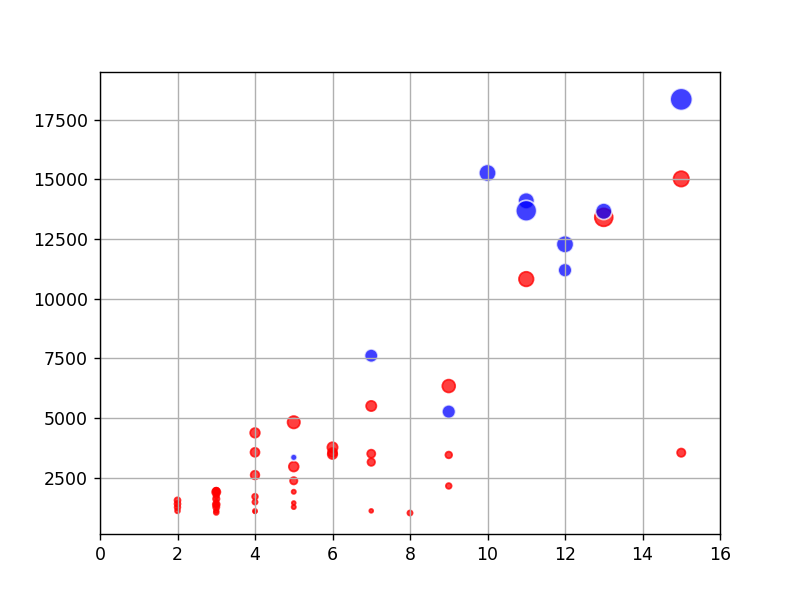

In [62]:
plt.scatter(x_axis, y_axis,marker='o',facecolors= 'red',edgecolors="red", s=TD,alpha=0.75)
plt.scatter(x1_axis, y1_axis,marker='o',facecolors= 'blue',edgecolors="white", s=TD1,alpha=0.75)
plt.xlim(0,16)
plt.grid()
plt.show()